In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CRITICAL BEHAVIOR AND THRESHOLD OF COEXISTENCE OF A PREDATOR–PREY STOCHASTIC MODEL IN A 2D LATTICE WITH NEURAL NETWORK POLICY PREDATOR

## Load data without policy
Lets load data and validate our model with this content

In [2]:
data = {}

In [3]:
for i in range(20):
    data[i] = pd.read_csv(f'results_{i}.csv')

In [4]:
data[0]['rho_2_barra'] = data[0]['rho'] ** 2
data[0]['rho_barra_2'] = data[0]['rho']

In [5]:
for i in range(1, 20):
    data[0]['rho'] += data[i]['rho']
    data[0]['rho_2_barra'] += data[i]['rho'] ** 2
    data[0]['rho_barra_2'] += data[i]['rho']
data[0]['rho'] = data[0]['rho'] / 20
data[0]['rho_2_barra'] = data[0]['rho_2_barra'] / 20
data[0]['rho_barra_2'] = (data[0]['rho_barra_2'] / 20) ** 2

In [6]:
data[0]

,time,rho,rho_2_barra,rho_barra_2
0,0,0.506764,0.256812,0.256810
1,100,0.483280,0.233565,0.233560
2,200,0.446687,0.199535,0.199529
3,300,0.405644,0.164552,0.164547
4,400,0.364995,0.133225,0.133221
...,...,...,...,...
895,89500,0.023691,0.000571,0.000561
896,89600,0.023799,0.000576,0.000566
897,89700,0.023661,0.000569,0.000560
898,89800,0.023700,0.000572,0.000562


In [7]:
df = data[0]

#### Lets calculate $U_L$ and $\Delta \rho$

- Order parameter Flutuation: $\Delta \rho = [<N_Y^2> - <N_Y>^2] \cdot N$ (susc)
- Order parameter Flutuation: $U_L= \frac{<N_Y^2>}{<N_Y>^2}$ (cumul)

In [8]:
df['susc'] = (df['rho_2_barra'] - df['rho_barra_2']) * 150
df['cumul'] = df['rho_2_barra'] / df['rho_barra_2']

In [9]:
df

,time,rho,rho_2_barra,rho_barra_2,susc,cumul
0,0,0.506764,0.256812,0.256810,0.000276,1.000007
1,100,0.483280,0.233565,0.233560,0.000772,1.000022
2,200,0.446687,0.199535,0.199529,0.000828,1.000028
3,300,0.405644,0.164552,0.164547,0.000791,1.000032
4,400,0.364995,0.133225,0.133221,0.000594,1.000030
...,...,...,...,...,...,...
895,89500,0.023691,0.000571,0.000561,0.001444,1.017151
896,89600,0.023799,0.000576,0.000566,0.001448,1.017047
897,89700,0.023661,0.000569,0.000560,0.001419,1.016894
898,89800,0.023700,0.000572,0.000562,0.001537,1.018243


### Graphs

## 1) $\rho(t, c_c)$

- $\rho(t, c_c) ~ t ^ {-\frac{\beta}{\nu Z}}$
- $c_c = 0.18838$ 

Lets calculate exponent $\frac{\beta}{\nu Z}$

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
) missing from current font.\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


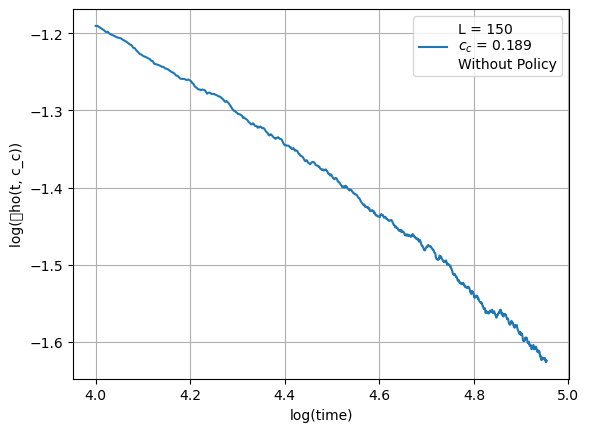

In [10]:
plt.plot(np.log10(df['time'])[100:], np.log10(df['rho'])[100:], label="L = 150\n$c_c$ = 0.189\nWithout Policy")
plt.ylabel("log(\rho(t, c_c))")
plt.xlabel("log(time)")
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg_rho_without_policy = LinearRegression()

In [13]:
# data
X_rho_0, y_rho_0 = np.log10(df['time'][100:].values.reshape(-1, 1)), np.log10(df['rho'][100:].values.reshape(-1, 1))

In [14]:
reg_rho_without_policy.fit(X_rho_0, y_rho_0)

LinearRegression()

In [15]:
reg_rho_without_policy.coef_

array([[-0.4683259]])

In [16]:
reg_rho_without_policy.predict([[4]])[0][0]

-1.1617144919447482

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
) missing from current font.\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


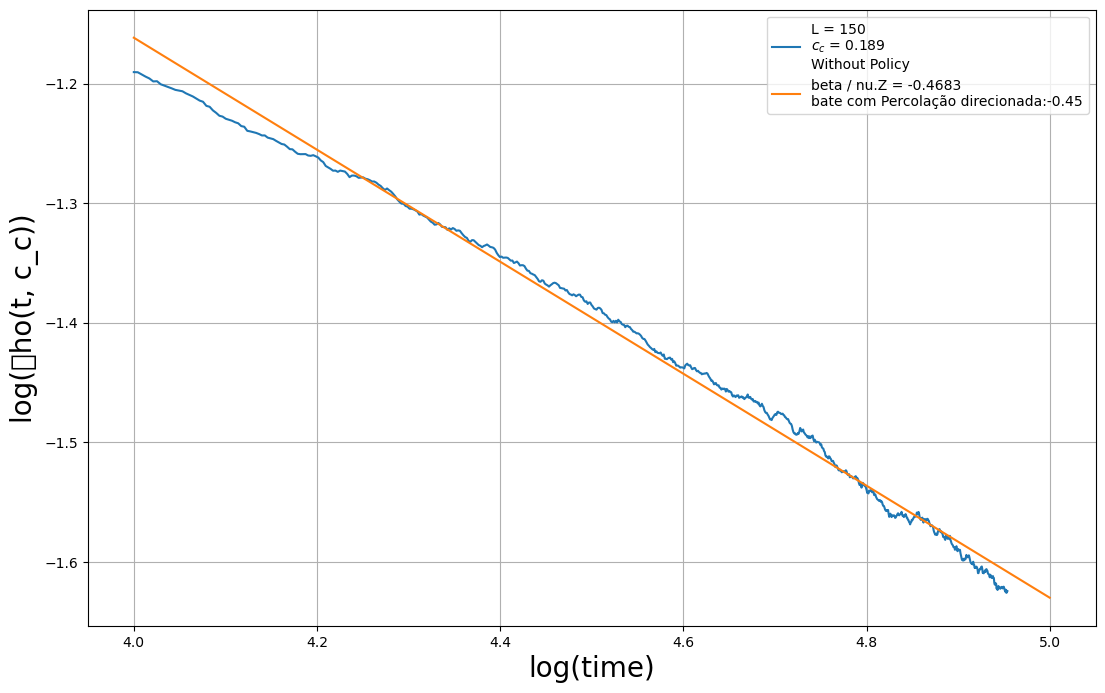

In [17]:
plt.figure(figsize=(13, 8))
plt.plot(np.log10(df['time'])[100:], np.log10(df['rho'])[100:], 
         label="L = 150\n$c_c$ = 0.189\nWithout Policy")
plt.plot([4, 5], 
         [ reg_rho_without_policy.predict([[4]])[0][0] , reg_rho_without_policy.predict([[5]])[0][0] ],
         label=f"beta / nu.Z = {reg_rho_without_policy.coef_[0][0]:.4f}\nbate com Percolação direcionada:-0.45",)
plt.ylabel("log(\rho(t, c_c))", fontsize=20)
plt.xlabel("log(time)", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

## 2) $\Delta \rho(t, c_c)$

- $\Delta \rho(t, c_c) ~ t ^ {-\frac{\gamma'}{\nu Z}}$
- $c_c = 0.18838$ 

Lets calculate exponent $\frac{\gamma '}{\nu Z}$

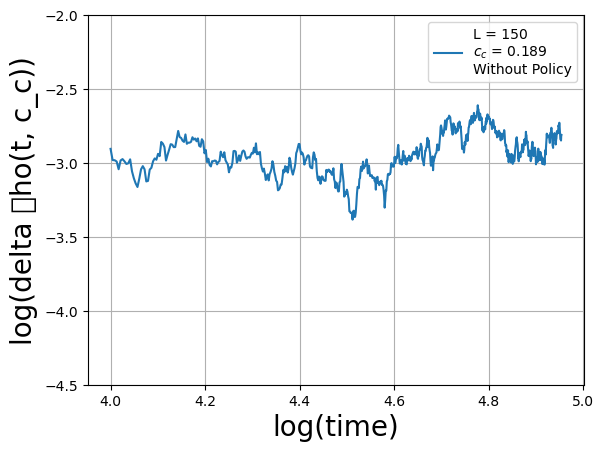

In [19]:
plt.plot(np.log10(df['time'])[100:], np.log10(df['susc'])[100:], label="L = 150\n$c_c$ = 0.189\nWithout Policy")
plt.ylabel("log(delta \rho(t, c_c))", fontsize=20)
plt.xlabel("log(time)", fontsize=20)
plt.legend()
plt.ylim([-4.5, -2.0])
plt.grid(True)
plt.show()

## Linear Regression

In [20]:
reg_susc_without_policy = LinearRegression()

In [21]:
X_susc_0, y_susc_0 = np.log10(df['time'][100:].values.reshape(-1, 1)), np.log10(df['susc'][100:].values.reshape(-1, 1))

In [22]:
reg_susc_without_policy.fit(X_susc_0, y_susc_0)

LinearRegression()

In [23]:
reg_susc_without_policy.coef_

array([[0.25043784]])

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


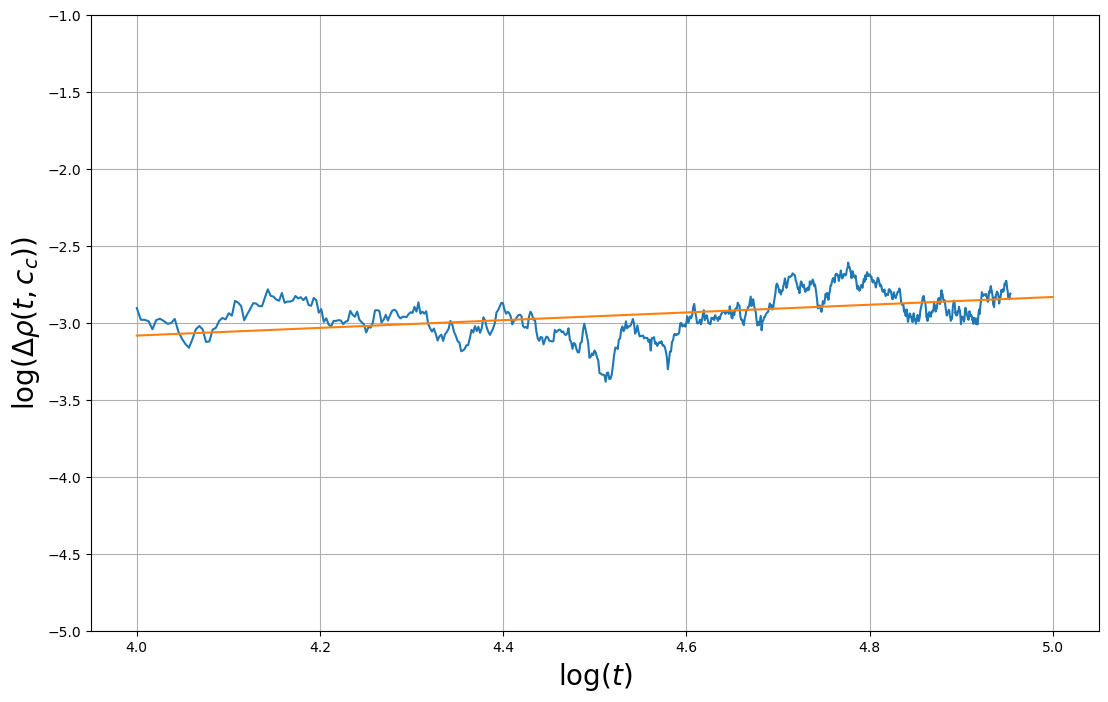

'\n\n\n'

In [30]:
plt.figure(figsize=(13, 8))
plt.plot(np.log10(df['time'])[100:], 
         np.log10(df['susc'])[100:], 
         label="L = 150\n$c_c$ = 0.189\nWithout Policy")
plt.plot([4, 5], 
         [ reg_susc_without_policy.predict([[4]])[0][0] , reg_susc_without_policy.predict([[5]])[0][0] ])
         #label=f"$\gamma / \nu Z$ = {reg_susc_without_policy.coef_[0][0]:.4f}\nbate com Percolação direcionada: 0.24" )
plt.ylabel(r"$\log(\Delta \rho(t, c_c))$", fontsize=20)
plt.xlabel(r"$\log(t)$", fontsize=20)
# plt.legend()
plt.ylim([-5.0, -1.0])
plt.grid(True)
plt.show()

'''


'''

## Conclusion

We can see that our model is validate. Both critical exponents follow prevision in the papers. In this case, we can build Neural Network predator and insert this in our model and calculate exponents. 

Hipotesis: To insert Neural Network will to turn predator more smart. So, this can change critic exponents?

Reasons to thinking about this: To insert Neural Network is insert another probability distribution. Our predator will to diffuse in the lattice 2D. If there is a prey in the behavior (and the prey is close to predator), the predator will to try to eat this prey, because Neural Network will try maximaze preys neighboors.

## Load data with policy

In [31]:
data_p_c26 = {}

In [32]:
for i in range(31):
    data_p_c26[i] = pd.read_csv(f'data_w_policy_cc/results_{i}_w_policy_c26_200.csv')
    data_p_c26[i]['rho_2_barra'] = data_p_c26[i]['rho'] ** 2

In [33]:
data_p_c26[0]

,time,rho,rho_2_barra
0,0,0.453450,0.205617
1,100,0.407375,0.165954
2,200,0.360875,0.130231
3,300,0.320850,0.102945
4,400,0.284625,0.081011
...,...,...,...
895,89500,0.093900,0.008817
896,89600,0.094700,0.008968
897,89700,0.096450,0.009303
898,89800,0.097675,0.009540


In [34]:
for i in range(1, 31):
    data_p_c26[0]['rho'] += data_p_c26[i]['rho']
    data_p_c26[0]['rho_2_barra'] += data_p_c26[i]['rho_2_barra']
data_p_c26[0]['rho'] /= 31
data_p_c26[0]['rho_2_barra']= (data_p_c26[0]['rho_2_barra'] / 31)
data_p_c26[0]['rho_barra_2']= (data_p_c26[0]['rho']) ** 2


In [35]:
df_p_c26 = data_p_c26[0]

#### Lets calculate $U_L$ and $\Delta \rho$

- Order parameter Flutuation: $\Delta \rho = [<N_Y^2> - <N_Y>^2] \cdot N$ (susc)
- Order parameter Flutuation: $U_L= \frac{<N_Y^2>}{<N_Y>^2}$ (cumul)

In [36]:
U_L = df_p_c26['rho_2_barra'] / df_p_c26['rho_barra_2']
delta_rho = (df_p_c26['rho_2_barra'] - df_p_c26['rho_barra_2']) * (200 * 200)

In [37]:
df_p_c26['susc'] = delta_rho
df_p_c26['cumul'] = U_L
df_p_c26

,time,rho,rho_2_barra,rho_barra_2,susc,cumul
0,0,0.454752,0.206804,0.206799,0.205464,1.000025
1,100,0.407744,0.166260,0.166255,0.216524,1.000033
2,200,0.362702,0.131561,0.131553,0.319115,1.000061
3,300,0.320806,0.102926,0.102917,0.370452,1.000090
4,400,0.283827,0.080565,0.080558,0.316453,1.000098
...,...,...,...,...,...,...
895,89500,0.091846,0.008462,0.008436,1.049270,1.003110
896,89600,0.091625,0.008427,0.008395,1.266648,1.003772
897,89700,0.091606,0.008423,0.008392,1.269158,1.003781
898,89800,0.091632,0.008429,0.008396,1.313223,1.003910


In [38]:
data_p_c27 = {}
for i in range(25):
    data_p_c27[i] = pd.read_csv(f'results_{i}_w_policy_270.csv')
    data_p_c27[i]['rho_2_barra'] = data_p_c27[i]['rho'] ** 2

In [39]:
data_p_c27[0]

,time,rho,rho_2_barra
0,0,0.443422,0.196623
1,100,0.394178,0.155376
2,200,0.348933,0.121754
3,300,0.308756,0.095330
4,400,0.268622,0.072158
...,...,...,...
895,89500,0.030711,0.000943
896,89600,0.030400,0.000924
897,89700,0.028800,0.000829
898,89800,0.028133,0.000791


In [40]:
for i in range(1, 25):
    data_p_c27[0]['rho'] += data_p_c27[i]['rho']
    data_p_c27[0]['rho_2_barra'] += data_p_c27[i]['rho_2_barra']
data_p_c27[0]['rho'] /= 25
data_p_c27[0]['rho_2_barra']= (data_p_c27[0]['rho_2_barra'] / 25)
data_p_c27[0]['rho_barra_2']= (data_p_c27[0]['rho']) ** 2

In [41]:
df_p_c27 = data_p_c27[0]

In [42]:
df_p_c27

,time,rho,rho_2_barra,rho_barra_2
0,0,0.447883,0.200606,0.200599
1,100,0.396706,0.157384,0.157375
2,200,0.348606,0.121539,0.121526
3,300,0.305300,0.093220,0.093208
4,400,0.268101,0.071892,0.071878
...,...,...,...,...
895,89500,0.014416,0.000249,0.000208
896,89600,0.014386,0.000249,0.000207
897,89700,0.014388,0.000247,0.000207
898,89800,0.014444,0.000250,0.000209


In [43]:
U_L = df_p_c27['rho_2_barra'] / df_p_c27['rho_barra_2']
delta_rho = (df_p_c27['rho_2_barra'] - df_p_c27['rho_barra_2']) * (150 * 150)

In [44]:
df_p_c27['susc'] = delta_rho
df_p_c27['cumul'] = U_L
df_p_c27

,time,rho,rho_2_barra,rho_barra_2,susc,cumul
0,0,0.447883,0.200606,0.200599,0.152935,1.000034
1,100,0.396706,0.157384,0.157375,0.193886,1.000055
2,200,0.348606,0.121539,0.121526,0.289994,1.000106
3,300,0.305300,0.093220,0.093208,0.268790,1.000128
4,400,0.268101,0.071892,0.071878,0.298021,1.000184
...,...,...,...,...,...,...
895,89500,0.014416,0.000249,0.000208,0.937592,1.200513
896,89600,0.014386,0.000249,0.000207,0.950982,1.204232
897,89700,0.014388,0.000247,0.000207,0.900368,1.193314
898,89800,0.014444,0.000250,0.000209,0.923100,1.196637


### Graphs

## 1) $\rho(t, c_c)$

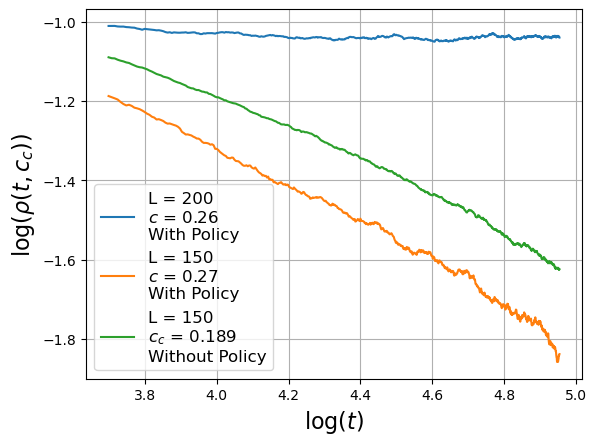

In [53]:
plt.plot(np.log10(df_p_c26['time'])[50:], np.log10(df_p_c26['rho'])[50:], label="L = 200\n$c$ = 0.26\nWith Policy")
plt.plot(np.log10(df_p_c27['time'])[50:], np.log10(df_p_c27['rho'])[50:], label="L = 150\n$c$ = 0.27\nWith Policy")
plt.plot(np.log10(df['time'])[50:], np.log10(df['rho'])[50:], label="L = 150\n$c_c$ = 0.189\nWithout Policy")

plt.ylabel(r"$\log(\rho(t, c_c))$", fontsize=16)
plt.xlabel(r"$\log(t)$", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Linear Regression

In [54]:
reg_rho_with_policy = LinearRegression()

In [55]:
X_rho_p = np.log10(df_p_c27['time'])[50:500].values.reshape(-1, 1)
y_rho_p = np.log10(df_p_c27['rho'])[50:500].values.reshape(-1, 1)

In [56]:
reg_rho_with_policy.fit(X_rho_p, y_rho_p)

LinearRegression()

In [57]:
reg_rho_with_policy.coef_

array([[-0.45869794]])

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


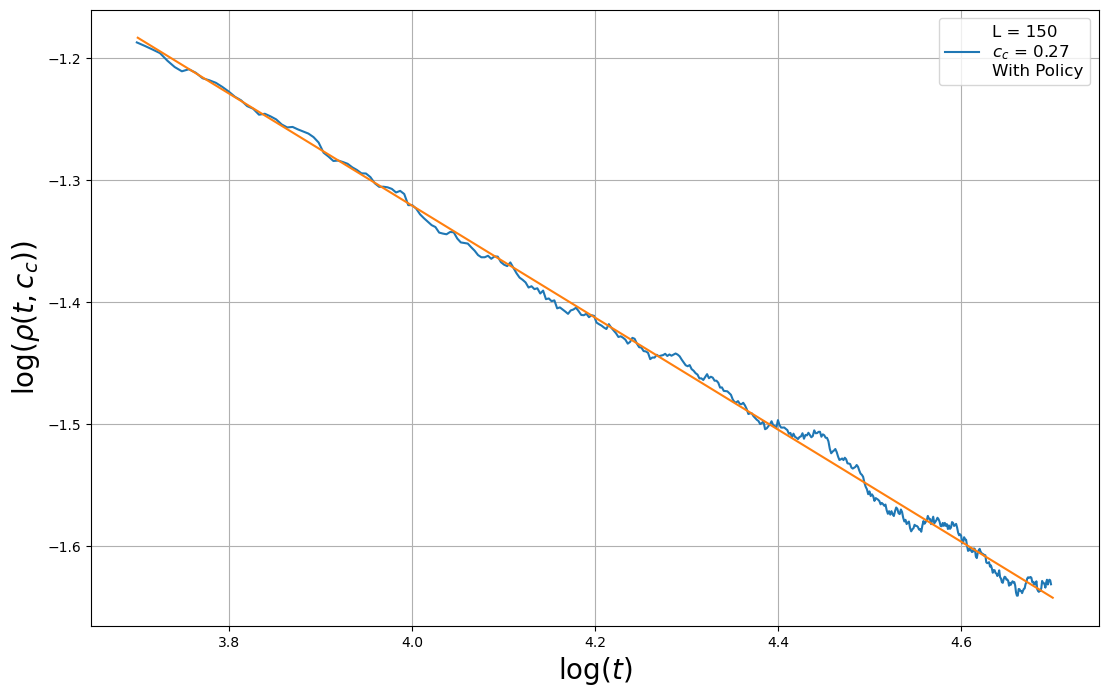

In [66]:
plt.figure(figsize=(13, 8))
plt.plot(np.log10(df_p_c27['time'])[50:500], np.log10(df_p_c27['rho'])[50:500], 
         label="L = 150\n$c_c$ = 0.27\nWith Policy")
plt.plot([3.7, 4.7], 
         [ reg_rho_with_policy.predict([[3.7]])[0][0] , reg_rho_with_policy.predict([[4.7]])[0][0] ])
         #label=f"beta / nu.Z = {reg_rho_with_policy.coef_[0][0]:.4f}\nbate com Percolação direcionada:-0.45",)
plt.ylabel(r"$\log(\rho(t, c_c))$", fontsize=20)
plt.xlabel(r"$\log(t)$", fontsize=20)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [67]:
reg_rho_with_policy.coef_[0][0]

-0.45869793542007187

## 2) $\Delta \rho$

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
) missing from current font.\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


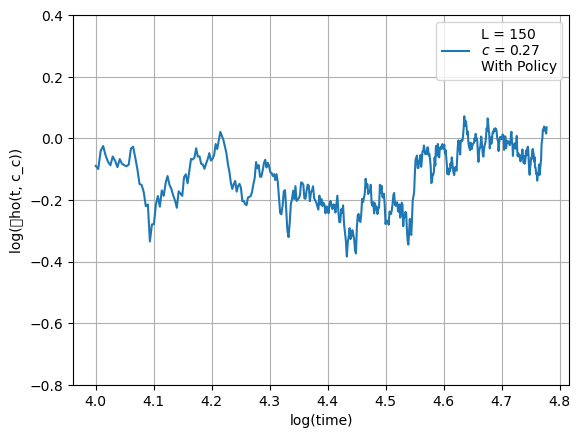

In [73]:
plt.plot(np.log10(df_p_c27['time'])[100:600], np.log10(df_p_c27['susc'])[100:600], label="L = 150\n$c$ = 0.27\nWith Policy")

plt.ylabel("log(\rho(t, c_c))")
plt.xlabel("log(time)")
plt.ylim([-0.8, 0.4])
plt.legend()
plt.grid(True)
plt.show()

In [74]:
reg_susc = LinearRegression()

In [75]:
X_susc_p = np.log10(df_p_c27['time'])[100:600].values.reshape(-1, 1)
y_susc_p = np.log10(df_p_c27['susc'])[100:600].values.reshape(-1, 1)

In [76]:
reg_susc.fit(X_susc_p, y_susc_p)

LinearRegression()

In [77]:
reg_susc.coef_

array([[0.20110612]])

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


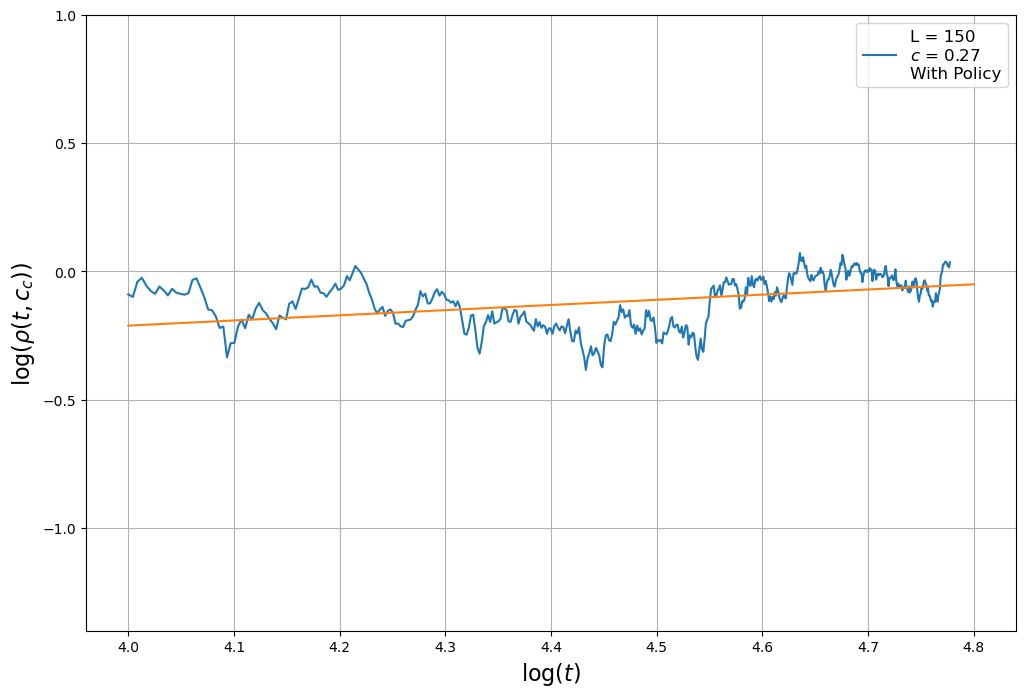

In [81]:
plt.figure(figsize=(12, 8))
plt.plot(np.log10(df_p_c27['time'])[100:600], np.log10(df_p_c27['susc'])[100:600], label="L = 150\n$c$ = 0.27\nWith Policy")
plt.plot([4, 4.8], 
         [reg_susc.predict([[4]])[0][0], reg_susc.predict([[4.8]])[0][0] ])
         #label=f"GAMMA ' / nu.Z = {reg_susc.coef_[0][0]:.4f}\nbate com Percolação direcionada:-0.24")
plt.ylabel(r"$\log(\rho(t, c_c))$", fontsize=16)
plt.xlabel(r"$\log(t)$", fontsize=16)
plt.ylim([-1.4, 1.0])
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [89]:
reg_susc.coef_[0][0]

0.201106118998961

## 3) $U_L$

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


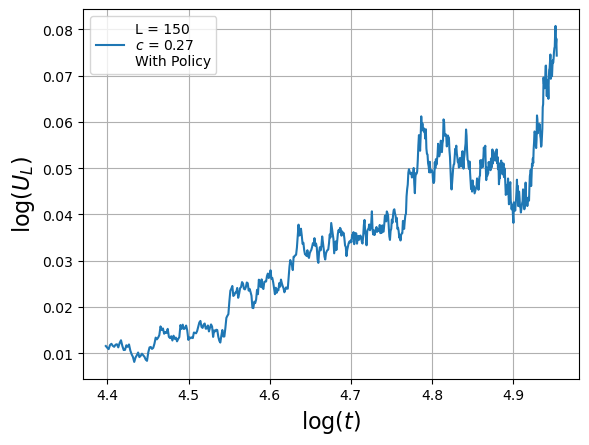

In [88]:
plt.plot(np.log10(df_p_c27['time'])[250:], np.log10(df_p_c27['cumul'])[250:], label="L = 150\n$c$ = 0.27\nWith Policy")

plt.ylabel(r"$\log(U_L)$", fontsize=16)
plt.xlabel(r"$\log(t)$", fontsize=16)

plt.legend()
plt.grid(True)
plt.show()

In [83]:
reg_cumul = LinearRegression()

In [84]:
X_cumul_p = np.log10(df_p_c27['time']).values.reshape(-1, 1)[825:]
y_cumul_p = np.log10(df_p_c27['cumul']).values.reshape(-1, 1)[825:]

In [85]:
reg_cumul.fit(X_cumul_p, y_cumul_p)

LinearRegression()

In [86]:
reg_cumul.coef_

array([[0.94215205]])

## Exponents

# New values to new graphs

In [98]:
data_cc272 = pd.read_csv('data_w_policy_cc272_100/results_w_policy_272_100_total_nb50.csv')
data_cc270 = pd.read_csv('data_w_policy_cc270_100/results_w_policy_270_100_total_nb50.csv')
data_cc268 = pd.read_csv('data_w_policy_cc268_100/results_w_policy_268_100_total_nb50.csv')

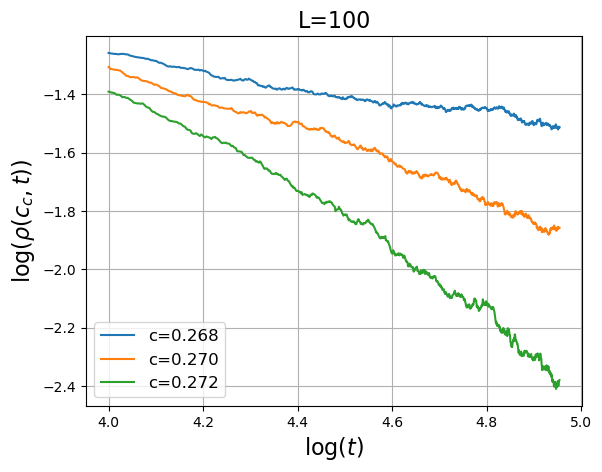

In [110]:
plt.plot( np.log10(data_cc268['time'][100:]), np.log10(data_cc268['rho'][100:]), label='c=0.268')
plt.plot( np.log10(data_cc270['time'][100:]), np.log10(data_cc270['rho'][100:]), label='c=0.270')
plt.plot( np.log10(data_cc272['time'][100:]), np.log10(data_cc272['rho'][100:]), label='c=0.272')
plt.title("L=100", fontsize=16)
plt.ylabel(r'$\log(\rho(c_c, t))$', fontsize=16)
plt.xlabel(r'$\log(t)$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()